<a href="https://colab.research.google.com/github/mehedihasan-cse/NLP-Problems/blob/main/Hate_Speech_Detection(Model).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [922]:
import numpy as np  #To work with multi-dimentional array and matrix
import pandas as pd  #Data Manipulation, Data strcutre
import matplotlib.pyplot as plt #Data Visualization
import seaborn as sns
import nltk
import string
!pip install sklearn.metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import seaborn as sns; sns.set()
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
%matplotlib inline

ERROR: Could not find a version that satisfies the requirement sklearn.metrics (from versions: none)
ERROR: No matching distribution found for sklearn.metrics


In [923]:
df = pd.read_csv("/content/modified_data (1).csv")

In [924]:
df.head()

,Content,Target
0,ভারতীয় দূতাবাস ঘেরাও দুপুর ২টা,1
1,আল্লাহ এর বিচারে হাসার সুযোগ ও পাবি না🫤,1
2,একজন চাওয়ালার থেকে আর কি আশা করা যায় কখনো ধর...,1
3,ফেরাউন কেও পানিতেই ডুবে মরতে হয়ে ছিলো। যাই হোক...,1
4,ভারতে বন্যা হয় কেনআল্লাহর গজববাংলাদেশে বন্যা হ...,1


In [925]:
df.columns.values

array(['Content', 'Target'], dtype=object)

In [926]:
df.value_counts()

,,count
Content,Target,
অভিনন্দন,0,1
মাদারবোর্ড মোদী💯💥🙂,1,1
মডি বাইনচুদ 😡,1,1
ভারতের রাষ্ট্রধুতকে তলব করে নিন্দা জানান।আমরা একা নয়,1,1
ভারতের দূতাবাস ঘেরাও দূতকে তলব এবং আন্তর্জাতিক আদালতে মামলা করা উচিত। এরপরেও ঠিক না হলে সাইবার অ্যাটাক করে তাদের সাইবার স্পেস তছনছ করে দেওয়া উচিত ২০১২ এর মতো।,1,1
...,...,...
গতকাল প্রবল বর্ষণে ভারতের তিস্তা নদীর জলবিদ্যুত প্রকল্প ভেঙে ধসে যাওয়ার সংবাদে কিছু মানুষ আলহামদুলিল্লাহ্‌ লিখেছিলো খুশি হয়েছিলো। অথচ এটা বোঝেনা তোমরা ভাটির দেশের মানুষ। ঐ জল গড়িয়ে বাংলাদেশের উপর দিয়েই প্রবাহিত হবে। ত্রিপুরার ডুম্বুর গেট খুলে দিতে বাধ্য হয়েছে ভারত তারা গতকাল সারাদিন অপেক্ষা করেছে। রাতে অবস্থা এতটাই খারাপের দিকে যাচ্ছিলো যে গেট খুলে না দিলে জলের তীব্র স্রোতে গেট ভেঙে জল বাংলাদেশে প্রবেশ করত। এতে ক্ষয়ক্ষতির পরিমাণ হতো আরো বেশী। বাংলাদেশ মানেই অশিক্ষার অন্ধকার।,1,1
কেন গতকাল যখন ভারতের একটা বাধ ভেঙে গেলো তখন তো আলহামদুলিল্লাহ বলছেন আজ যখন সেই পানি এসে দেশে বন্যা হচ্ছে তখন ইন্না নিল্লাহ পড়তাছেন সরকার বন্যা নিয়ন্ত্রণ করতে না পড়ে এখন ভারতীয় ষড়যন্ত্র বলে চালিয়ে দিচ্ছে।,1,1
কুত্তা,1,1


# **Data Pre-Processing**

In [927]:
df.drop_duplicates(inplace =True)
df = df.replace('\n','',regex= True)
df = df.replace(',,',',',regex= True)

In [928]:
df

,Content,Target
0,ভারতীয় দূতাবাস ঘেরাও দুপুর ২টা,1
1,আল্লাহ এর বিচারে হাসার সুযোগ ও পাবি না🫤,1
2,একজন চাওয়ালার থেকে আর কি আশা করা যায় কখনো ধর...,1
3,ফেরাউন কেও পানিতেই ডুবে মরতে হয়ে ছিলো। যাই হোক...,1
4,ভারতে বন্যা হয় কেনআল্লাহর গজববাংলাদেশে বন্যা হ...,1
...,...,...
126,💕,0
127,না ভাই আপনার এটা ভুল ধারণা পৃথিবীর মধ্যে শ্রেষ...,0
128,দিনাজপুরে আসার আহ্বান থাকবে,0
129,😍😍😍,0


In [929]:
punct=string.punctuation

In [930]:
def remove_punct(x):
    if isinstance(x, str):  # Check if x is a string
        return x.translate(str.maketrans("", "", punct))
    else:
        return x  # Return the original value if it's not a string

df['Content'] = df['Content'].apply(lambda x: remove_punct(x))

In [931]:
df

,Content,Target
0,ভারতীয় দূতাবাস ঘেরাও দুপুর ২টা,1
1,আল্লাহ এর বিচারে হাসার সুযোগ ও পাবি না🫤,1
2,একজন চাওয়ালার থেকে আর কি আশা করা যায় কখনো ধর...,1
3,ফেরাউন কেও পানিতেই ডুবে মরতে হয়ে ছিলো। যাই হোক...,1
4,ভারতে বন্যা হয় কেনআল্লাহর গজববাংলাদেশে বন্যা হ...,1
...,...,...
126,💕,0
127,না ভাই আপনার এটা ভুল ধারণা পৃথিবীর মধ্যে শ্রেষ...,0
128,দিনাজপুরে আসার আহ্বান থাকবে,0
129,😍😍😍,0


In [932]:
df.isna().sum()

,0
Content,1
Target,0


In [933]:
df.dropna(inplace=True)

In [934]:
df.isna().sum()

,0
Content,0
Target,0


In [935]:
x = df.Content.values
y = df.Target.values

In [936]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.3, random_state=42)

In [937]:
def evaluate_model(model, xtest, ytest):
    y_pred = model.predict(xtest)
    accuracy = accuracy_score(ytest, y_pred)
    cm = confusion_matrix(ytest, y_pred)
    return {
        'Accuracy': accuracy,
        'Confusion Matrix': cm,
    }

In [938]:
vectorizer = TfidfVectorizer()
xtrain = vectorizer.fit_transform(xtrain)
xtest = vectorizer.transform(xtest)

mnb_model = MultinomialNB(alpha=1.0, fit_prior=True, class_prior=None)
mnb_model.fit(xtrain, ytrain)

MultinomialNB()

In [939]:
from sklearn.metrics import precision_recall_curve, auc

In [940]:
nb_results = evaluate_model(mnb_model, xtest, ytest)
nb_results

{'Accuracy': 0.8974358974358975,
 'Confusion Matrix': array([[ 2,  4],
        [ 0, 33]])}

In [941]:
cm = confusion_matrix(ytest, mnb_model.predict(xtest))
cm

array([[ 2,  4],
       [ 0, 33]])

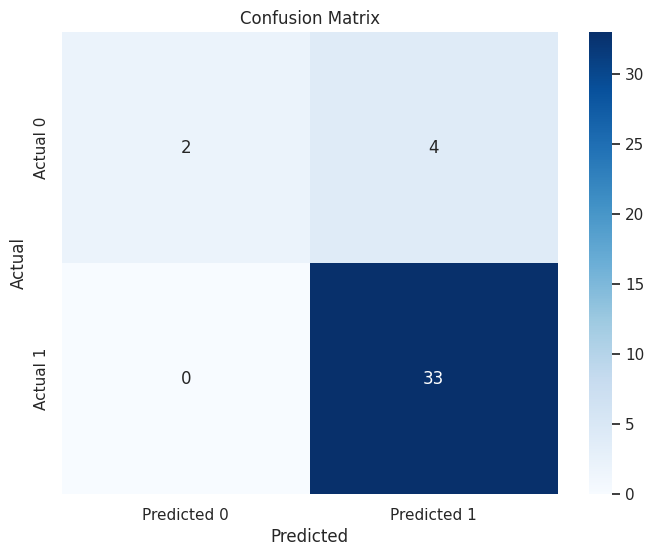

In [942]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [943]:
print(classification_report(ytest, mnb_model.predict(xtest)))

              precision    recall  f1-score   support

           0       1.00      0.33      0.50         6
           1       0.89      1.00      0.94        33

    accuracy                           0.90        39
   macro avg       0.95      0.67      0.72        39
weighted avg       0.91      0.90      0.87        39



In [944]:
from sklearn.metrics import RocCurveDisplay

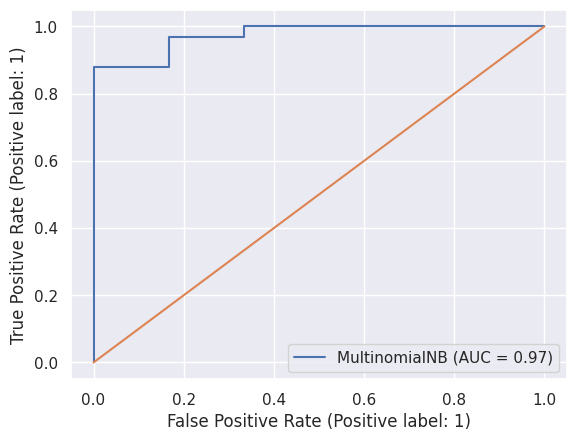

In [945]:
RocCurveDisplay.from_estimator(mnb_model, xtest, ytest)
plt.plot([0,1],[0,1])

In [946]:

#Drop column --> axis= 1 ; row --> axis= 0
#x = df.drop(columns = ['target','label'], axis= 1)
#y = df[['target','label']]
x= df.Content.values
y= df.Target.values

# Train-Test

In [947]:
from sklearn.model_selection import train_test_split

In [948]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.3)

*Vectorizer*

In [949]:
from sklearn.feature_extraction.text import CountVectorizer

In [950]:
cv= CountVectorizer()
x_train = cv.fit_transform(xtrain)
x_test = cv.transform(xtest)

## **Model Algorithm**

In [951]:
from sklearn.naive_bayes import MultinomialNB

In [952]:
mnb_model = MultinomialNB()
mnb_model.fit(x_train,ytrain)

MultinomialNB()

In [953]:
labels = mnb_model.score(x_test, ytest)
print(labels)

0.9230769230769231


In [954]:
from sklearn.linear_model import LogisticRegression

In [955]:
model = LogisticRegression()
model.fit(x_train, ytrain)

LogisticRegression()

In [956]:
lr_results = model.score(x_test, ytest)
print(lr_results)

0.8717948717948718


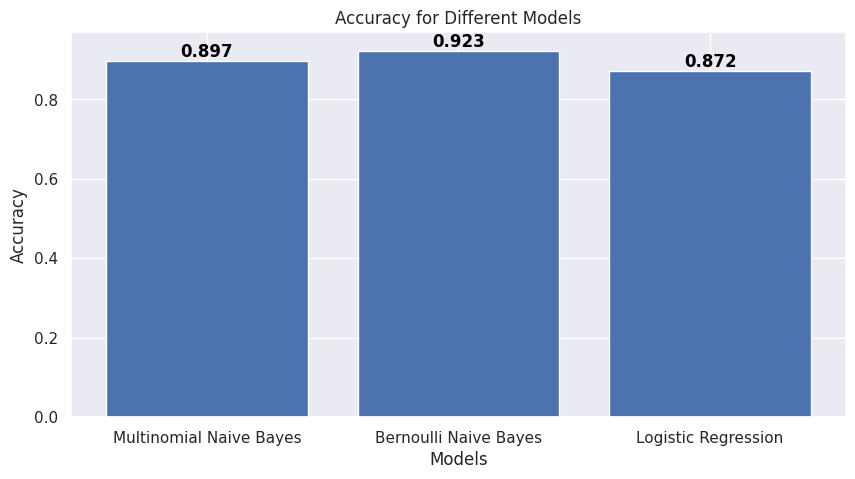

In [957]:
def plot_histogram(metric_values, model_names, metric_name):
    fig, ax = plt.subplots(figsize=(10, 5))
    bars = plt.bar(model_names, metric_values)
    plt.xlabel('Models')
    plt.ylabel(metric_name)
    plt.title(f'{metric_name} for Different Models')

    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 3), ha='center', va='bottom', color='black', fontweight='bold')

    plt.show()

accuracy_values = [nb_results['Accuracy'], labels, lr_results]
model_names = ['Multinomial Naive Bayes', 'Bernoulli Naive Bayes', 'Logistic Regression']
plot_histogram(accuracy_values, model_names, 'Accuracy')

# **Draft Code**

pip install bnlp_toolkit
from wordcloud import WordCloud
from bnlp import NLTKTokenizer

category_column = 'text'

text_data = ' '.join(df[category_column].dropna().astype(str))

# Initialize the tokenizer
bnltk = NLTKTokenizer()

# Tokenize the text data
words = bnltk.word_tokenize(text_data)

# Join the tokenized words back into a single string
processed_text_data = ' '.join(words)

bengali_font_path = '/content/SutonnyMJ Regular.ttf'

wordcloud = WordCloud(font_path=bengali_font_path, width=800, height=400, background_color='white').generate(text_data)

# Display the word cloud using matplotlib

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


  prob = model.predict_proba(xtest)[:, 1]
    roc_auc = roc_auc_score(ytest, prob)
    fpr, tpr, thresholds = roc_curve(ytest, prob)
    precision, recall, _ = precision_recall_curve(ytest, prob)
    pr_auc = auc(recall, precision)